<a href="https://colab.research.google.com/github/Preeekc/6CS012WeeklyWorkshop/blob/main/PreetiKC_Worksheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Started with Image Processing with Python.
Introduction to Python Imaging Library(PIL)

Exercise - 1:
Complete all the Task.

1. Read and display the image.

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lenna.png to Lenna (2).png


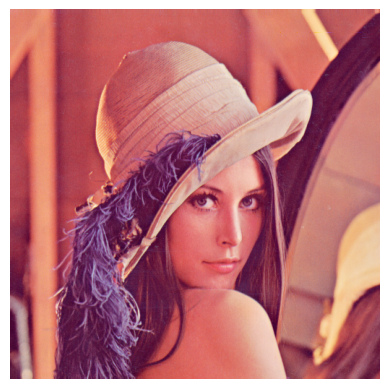

In [ ]:
image = Image.open("Lenna.png")
plt.imshow(image)
plt.axis("off")
plt.show()

2. Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.


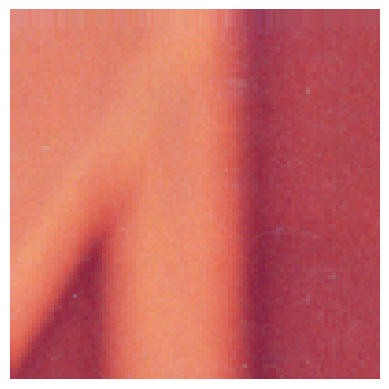

In [ ]:
image_array = np.array(image)
top_left = image_array[:100, :100]

plt.imshow(top_left)
plt.axis("off")
plt.show()

3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

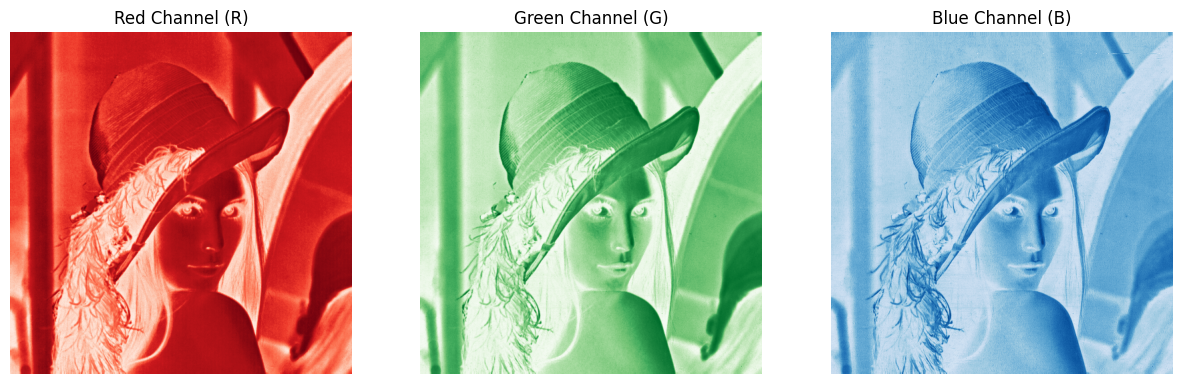

In [ ]:
R = image_array[:, :, 0]
G = image_array[:, :, 1]
B = image_array[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(R, cmap="Reds")
axes[0].set_title("Red Channel (R)")
axes[0].axis("off")

axes[1].imshow(G, cmap="Greens")
axes[1].set_title("Green Channel (G)")
axes[1].axis("off")

axes[2].imshow(B, cmap="Blues")
axes[2].set_title("Blue Channel (B)")
axes[2].axis("off")

plt.show()

2.2 Exercise - 2: Complete all the Task.



1. Load and display a grayscale image.

• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cameraman.png to cameraman.png


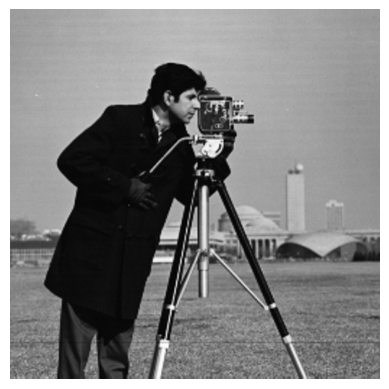

In [ ]:
image_path = "cameraman.png"
image = Image.open(image_path).convert("L")

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.

• Display this cropped image using matplotlib.

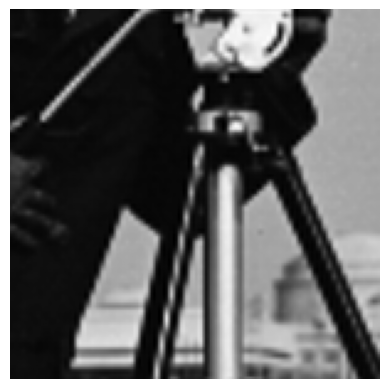

In [ ]:
image_path = "cameraman.png"
image = Image.open(image_path).convert("L")
image_np = np.array(image)

height, width = image_np.shape
center_x = width // 2
center_y = height // 2

cropped_image = image_np[center_y - 75:center_y + 75, center_x - 75:center_x + 75]

plt.imshow(cropped_image, cmap='gray')
plt.axis('off')
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).

• Display the resulting binary image.

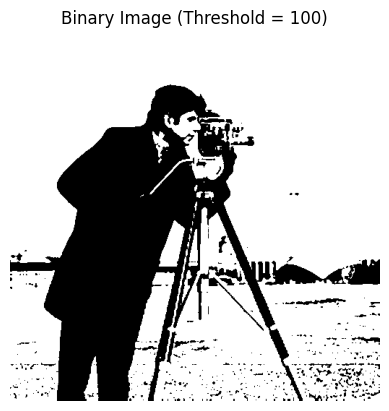

In [ ]:
threshold = 100
binary_image = np.where(image_array < threshold, 0, 255).astype(np.uint8)

plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.title("Binary Image (Threshold = 100)")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.

• Display the rotated image using matplotlib.

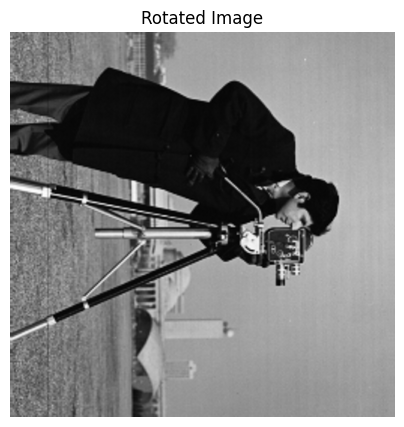

In [ ]:
rotated_image = np.rot90(image_array, k=-1)

plt.figure(figsize=(5, 5))
plt.imshow(rotated_image, cmap="gray")
plt.axis("off")
plt.title("Rotated Image")
plt.show()



5. Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.

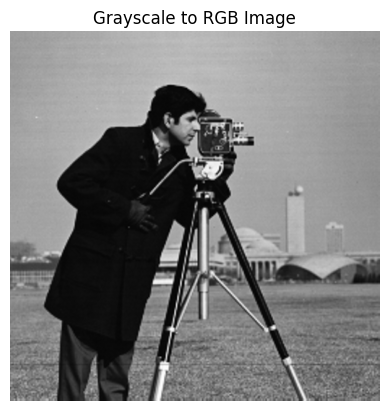

In [ ]:
rgb_image = Image.merge("RGB", (image, image, image))

plt.imshow(rgb_image)
plt.axis("off")
plt.title("Grayscale to RGB Image")
plt.show()

Exercise 3. Image Compression and Decompression using PCA.
In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.

1. Load and Prepare Data:

• Fetch an image of your choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dalmation.png to Dalmation.png


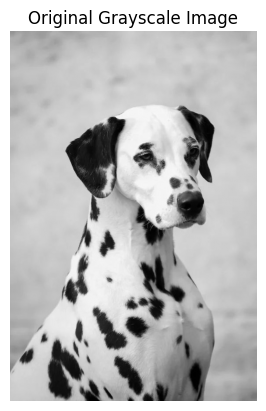

In [ ]:
image = Image.open("Dalmation.png").convert("L")
image_array = np.array(image)

# Display the original grayscale image
plt.imshow(image_array, cmap="gray")
plt.axis("off")
plt.title("Original Grayscale Image")
plt.show()


In [ ]:
mean = np.mean(image_array)
std = np.std(image_array)

standardized_image = (image_array - mean) / std

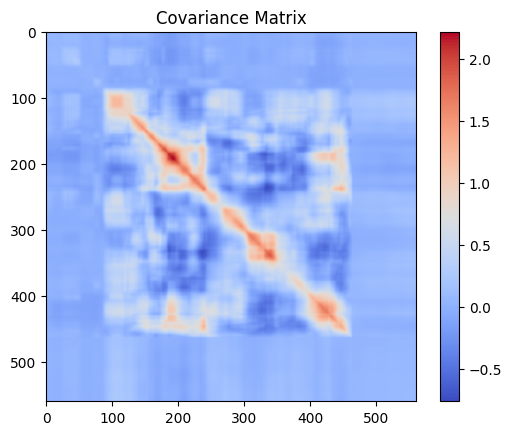

In [ ]:
flattened_image = standardized_image.reshape(-1, standardized_image.shape[1])

cov_matrix = np.cov(flattened_image, rowvar=False)

plt.imshow(cov_matrix, cmap="coolwarm")
plt.colorbar()
plt.title("Covariance Matrix")
plt.show()

2. Eigen Decomposition and Identifying Principal Components:

• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

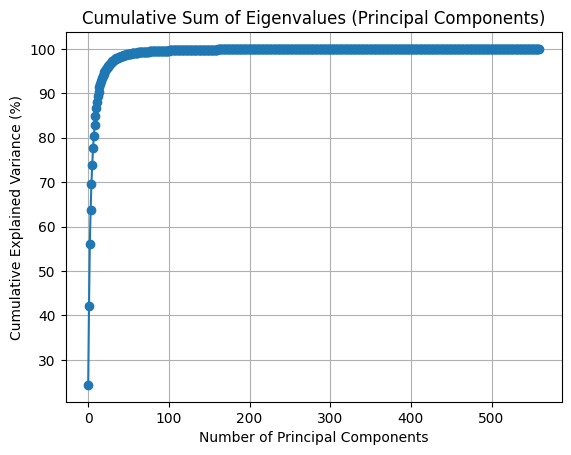

Top 5 Eigenvalues:
[125.72137076  91.27890705  72.44653222  39.34766831  30.41980959]
Top 5 Eigenvectors:
[[ 0.00407891 -0.00680967 -0.00788135 -0.00868984 -0.02058392]
 [ 0.00432707 -0.00599076 -0.007804   -0.00870364 -0.0200846 ]
 [ 0.00455019 -0.0049159  -0.00755119 -0.00868747 -0.01935529]
 ...
 [ 0.00139339 -0.02451669 -0.00235936 -0.00565013 -0.00980155]
 [ 0.00151603 -0.02434339 -0.00254312 -0.00578871 -0.00989259]
 [ 0.00160968 -0.02416408 -0.00269443 -0.0058358  -0.00997045]]


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

cumulative_sum = np.cumsum(sorted_eigenvalues)
total_sum = cumulative_sum[-1]
cumulative_percentage = cumulative_sum / total_sum * 100


plt.plot(cumulative_percentage, marker='o')
plt.title('Cumulative Sum of Eigenvalues (Principal Components)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
plt.show()

k = 5
print(f"Top {k} Eigenvalues:")
print(sorted_eigenvalues[:k])

print(f"Top {k} Eigenvectors:")
print(sorted_eigenvectors[:, :k])



3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

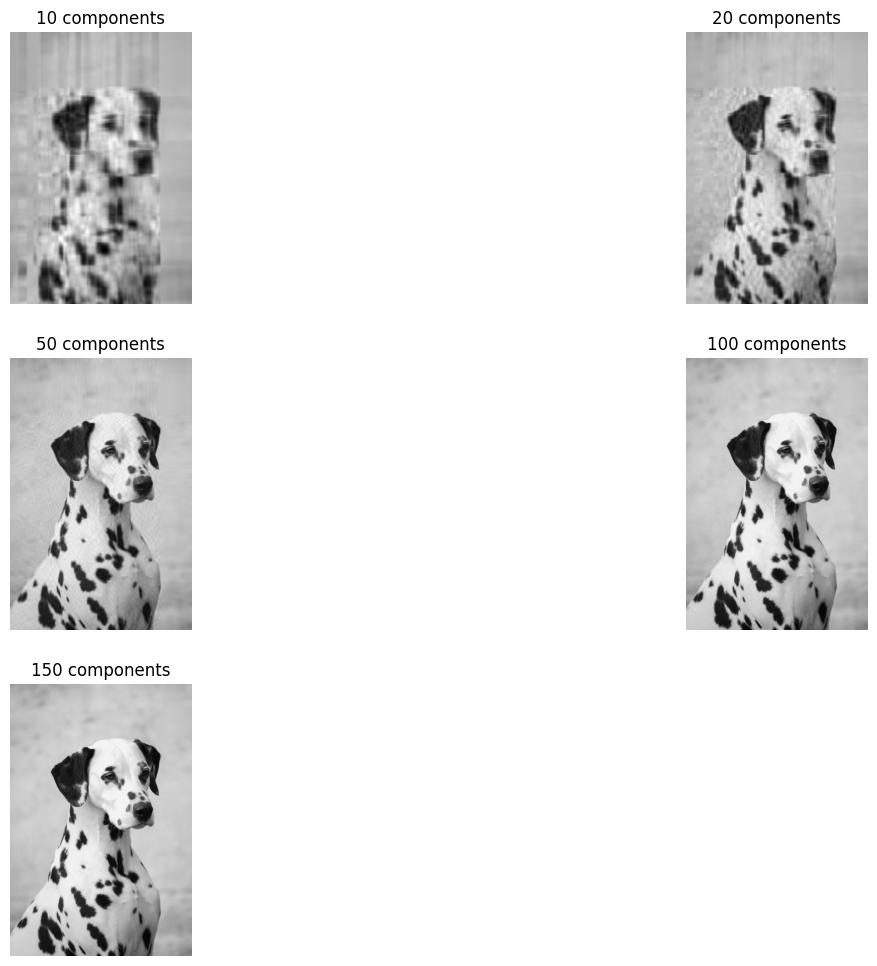

In [ ]:
# Load the Dalmation image
image = Image.open("/content/Dalmation.png")
image_gray = image.convert("L")  # Convert to grayscale
image_array = np.array(image_gray)

# Center the data by subtracting the mean
mean = np.mean(image_array, axis=0)
centered_data = image_array - mean

# Compute the covariance matrix
cov_matrix = np.cov(centered_data.T)

# Perform Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Specify different values of k for the number of components to select
top_k = [10, 20, 50, 100, 150]

# Calculate explained variance for each eigenvalue
explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)

# Plot the results for different values of k
plt.figure(figsize=(16, 12))
for i, k in enumerate(top_k):
    selected_eigenvectors = eigenvectors_sorted[:, :k]  # Select top k eigenvectors
    projected_data = np.dot(centered_data, selected_eigenvectors)  # Project the data
    reconstructed_data = np.dot(projected_data, selected_eigenvectors.T) + mean  # Reconstruct the data
    reconstructed_data = np.real(reconstructed_data)  # Ensure real values (in case of complex values)

    # Display the reconstructed image
    plt.subplot(3, 2, i + 1)
    plt.imshow(reconstructed_data, cmap='gray')
    plt.title(f"{k} components")
    plt.axis('off')

# Show all the images
plt.show()
